In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,average_precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


 Configure SVM
 

In [2]:
np.random.seed(42) 

In [3]:
train_data=pd.read_csv('cancer-data-train.csv',header=None)
test_data=pd.read_csv('cancer-data-test.csv',header=None)

In [4]:
X_train,y_train = train_data.iloc[:,:-1],train_data.iloc[:,-1].astype("category").cat.codes
X_test,y_test = test_data.iloc[:,:-1],test_data.iloc[:,-1].astype("category").cat.codes

In [5]:
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.fit_transform(X_test)

In [6]:
C_values=[0.01,0.1,1,10,100]

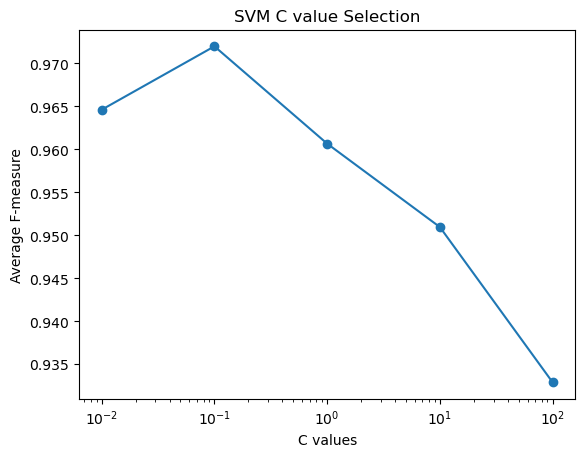

In [7]:
F_measure=[]
for c in C_values:
    SVM_model=SVC(kernel='linear',C=c)
    cv_scores=cross_validate(SVM_model,X_train_scaled,y_train,cv=10,scoring='f1_macro') # using scaled training data taking care
    mean_F=np.mean(cv_scores['test_score'])                                            # of SVM sensitivity to scaling.
    F_measure.append(mean_F)
plt.plot(C_values, F_measure, marker='o')
plt.xscale('log')  #  logarithmic scale gives better visualization for decimal numbers
plt.xlabel('C values')
plt.ylabel('Average F-measure')
plt.title('SVM hyper para C value Selection')
plt.show()
    

In [ ]:
''' From the above graph, it is observed that for our dataset the best value of C for cross validation of SVM model is 0.1.
 smaller value of C gives high margin and makes the decision boundary smooth which is the target of SVM to get high marigin
 so that the misclassification of label for new train point is very low. Other high values of C(1,10,100) fit the training data
 more closely that can lead to overfitting.
 '''

Configure Decision Tree

In [8]:
k_values=[2,5,10,20]

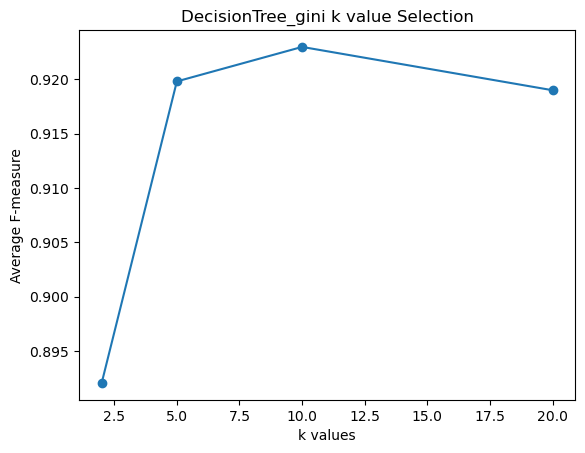

In [14]:
# For decsion tree using gini index

F_measure_gini=[]
for k in k_values:
    DT_model=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=k,random_state=42)
    cv_scores=cross_validate(DT_model,X_train_scaled,y_train,cv=10,scoring='f1_macro') # No need of scaling for DT as it is not sensitive like SVM
    mean_F=np.mean(cv_scores['test_score'])
    F_measure_gini.append(mean_F)
plt.plot(k_values,F_measure_gini,marker='o')
plt.xlabel('k values')
plt.ylabel('Average F-measure')
plt.title('DecisionTree_gini k value Selection')
plt.show()

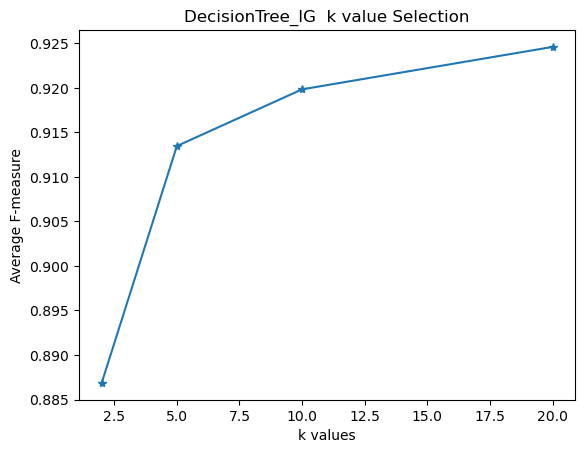

In [15]:
# For decsion tree using Information Gain

F_measure_IG=[]
for k in k_values:
    DTIG_model=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=k,random_state=42)
    cv_scores_IG=cross_validate(DTIG_model,X_train_scaled,y_train,cv=10,scoring='f1_macro') # No need as it is not senistive to scaling but asked to Prof,she said to use scaled. 
    mean_FIG=np.mean(cv_scores_IG['test_score'])
    F_measure_IG.append(mean_FIG)
plt.plot(k_values,F_measure_IG,marker='*')
plt.xlabel('k values')
plt.ylabel('Average F-measure')
plt.title('DecisionTree_IG  k value Selection')
plt.show()

In [ ]:
''' A larger tree doesnot mean a better F-measure because larger tree might capture more complex patterns in the training data 
which might lead to overfitting.A larger tree with more leaf nodes can be more complex and fit the training data very well but
may fail to generalize new data.The best criterion for our data set is gini with optimal size of max_leaf_nodes(k=10).
'''

Classifier Evaluation

SVM - Confusion Matrix:
[[62  0]
 [ 2 36]]
DT_IG - Confusion Matrix:
[[57  5]
 [ 5 33]]
DT_Gini - Confusion Matrix:
[[57  5]
 [ 4 34]]
Naive_Bayes - Confusion Matrix:
[[57  5]
 [ 3 35]]


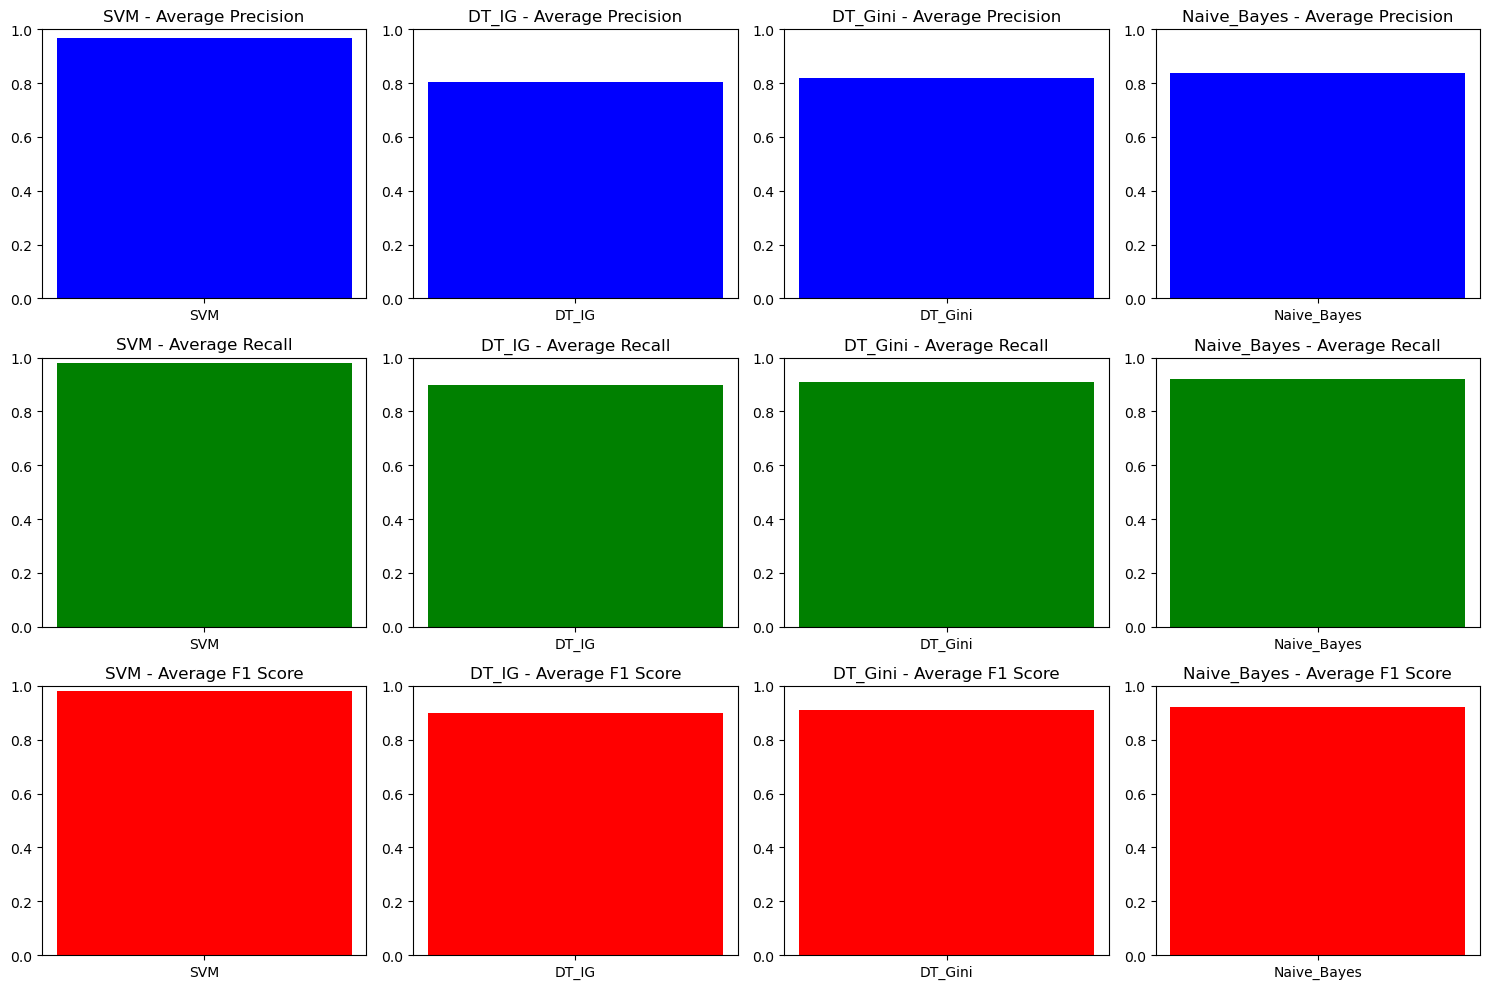

In [27]:
names=['SVM','DT_IG','DT_Gini','Naive_Bayes']
classifiers=[SVC(kernel='linear',C=0.1),
            DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=20),
            DecisionTreeClassifier(criterion='gini',max_leaf_nodes=10),
            GaussianNB()]
fig, axes = plt.subplots(nrows=3, ncols=len(classifiers), figsize=(15, 10))
for i,(name,clf) in enumerate(zip(names, classifiers),1):
        clf.fit(X_train_scaled, y_train)
        # Predict
        y_pred = clf.predict(X_test_scaled)
        cm=confusion_matrix(y_test,y_pred)
        acc = accuracy_score(y_test, y_pred)
        ap = average_precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred, average='weighted') 
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f'{name} - Confusion Matrix:')
        print(cm)
        
        ax = axes[0, i - 1]
        ax.bar([name], [ap], color='blue')
        ax.set_ylim(0, 1)
        ax.set_title(f'{name} - Average Precision')
    
    # Plotting average recall
        ax = axes[1, i - 1]
        ax.bar([name], [rec], color='green')
        ax.set_ylim(0, 1)
        ax.set_title(f'{name} - Average Recall')
    
    # Plottng average F1 score
        ax = axes[2, i - 1]
        ax.bar([name], [f1], color='red')
        ax.set_ylim(0, 1)
        ax.set_title(f'{name} - Average F1 Score')


plt.tight_layout()
plt.show()

        
        

In [ ]:
'''
From the above observations, all the metrics have high value  for SVM(linear kernel)classifier. So I would think 
the single winner for this dataset is SVM. It might be because it is based on statistical approaches and perfectly classifies
the classes by finding the maximum distance between two classes. 
'''